In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import copy

import model
from model import SorptionStorageSystem

Model Imported Successfully!


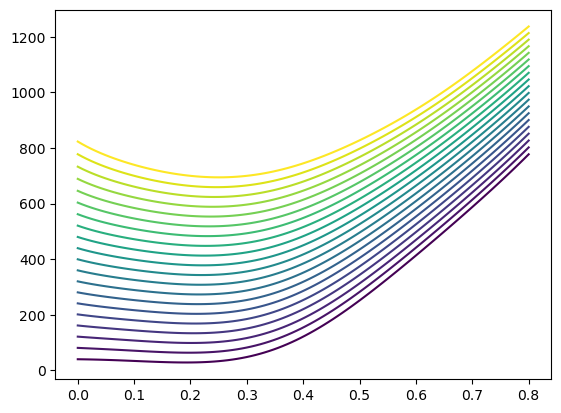

In [30]:
# color cycle to viridis
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.viridis(np.linspace(0, 1, 20)))

# hx diagram NaOH
x = np.linspace(0, 0.8, 100)
t = np.linspace(10,190, 20)

ht = [] # h(t)
for i in range(len(t)):
    hx = [] # h(x)
    for j in range(len(x)):
        h = NaOH.enthalpy(x[j], t[i])
        hx.append(h)
    ht.append(hx)
    # plot with log(y)
    plt.plot(x, hx, label=f't = {t[i]}')
#plt.legend()
#plt.yscale('log')

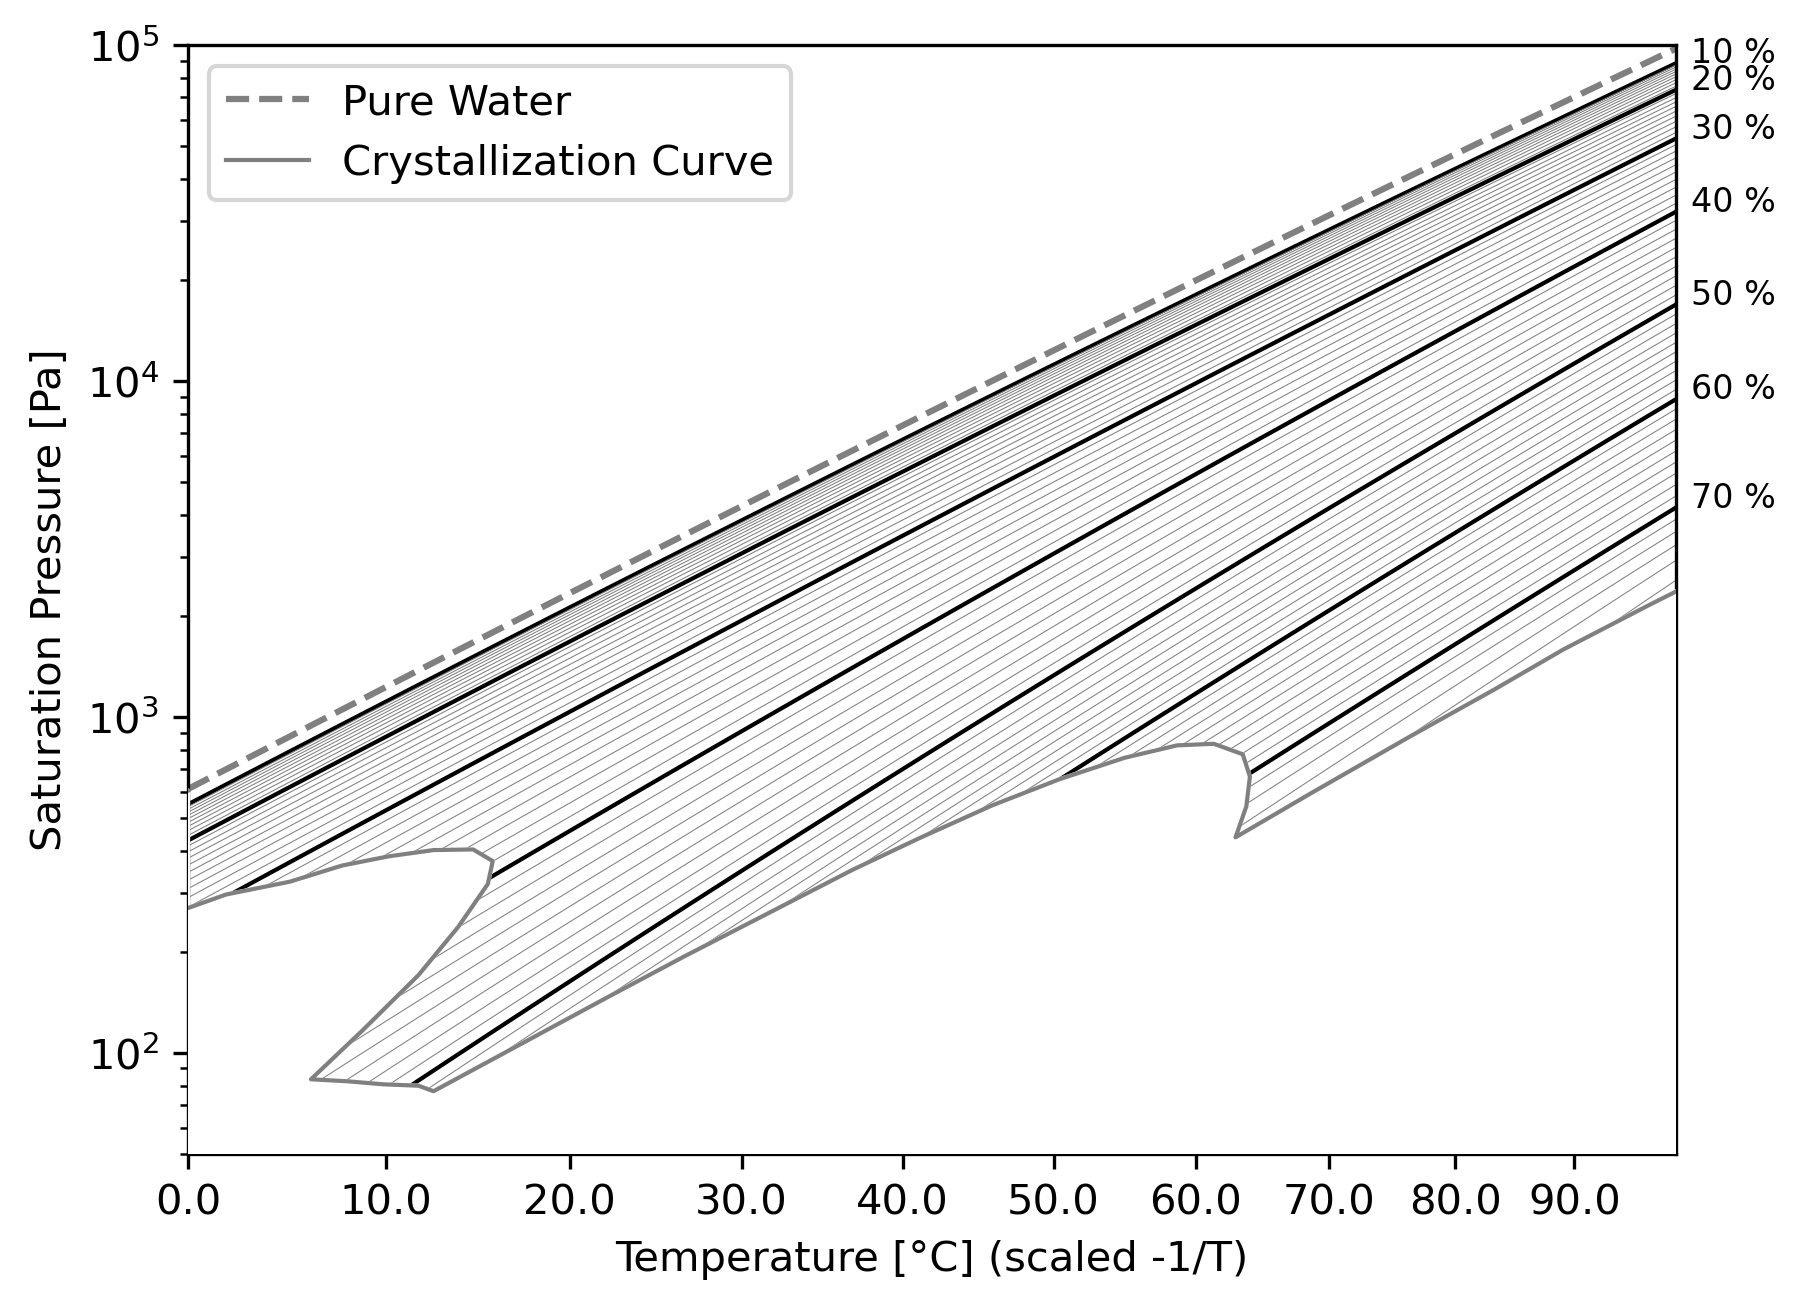

In [31]:
NaOH.pTDiagram()

# Perform simple calculation


In [2]:
# initialize model
model = SorptionStorageSystem()

# run model
results_a = model.run_absorption(AD_only=True)
results_a

{'Q_EC': nan,
 'Q_AD': -104.58073522125203,
 'Q_EC_amb': nan,
 'Q_AD_amb': -276.1330359057463,
 'dQ_sol_abs': -25.255058533932015,
 'energy_balance': nan,
 'energy_balance_EC': nan,
 'energy_balance_AD': -1.4779288903810084e-11,
 'capacity': 95.118668701234,
 't_discharge': 3274285.7142857146,
 't_discharge_h': 909.5238095238096,
 'x_in': 0.5,
 'x_out': 0.4484891901192492,
 'x_AD_sat': 0.4476390089917017,
 'T_amb': 24.0,
 'T_AD_from_tank': 26.0,
 'T_AD_sat': 44.653953843131475,
 'T_AD_in': 26.0,
 'T_AD_out': 42.53985615723862,
 't_AD_in': 29.0,
 't_AD_out': 30.087641964684813,
 'T_EC': nan,
 't_EC_in': nan,
 't_EC_out': nan,
 'm_vap_EC': nan,
 'm_vap_AD': 0.00016079570126066218,
 'm_ext_EC': nan,
 'm_ext_AD': 0.023,
 'm_sol_in': 0.0014,
 'm_sol_out': 0.0015607957012606622,
 'p_EC': 1500.0,
 'p_AD': 1499.4946544101074,
 'h_sol_in': 303432.64185587695,
 'h_sol_out': 288353.4063866549,
 'hV': 2524749.271765723,
 'hL': 54685.14341412774,
 'dh_lv': 2470064.1283515953,
 'rhoV': 0.01136853341

# Perform parameter variation

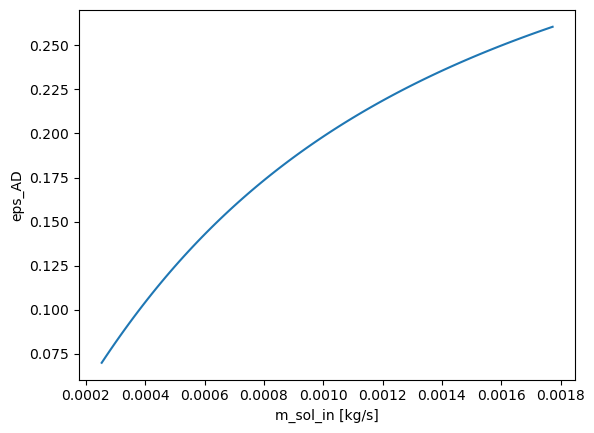

In [4]:
params = "/Users/dorianhoffner/Nextcloud/obsidian_vaults/BEST/02_Project_Files/Repositories/tcs_equilibrium_model/Python_Model/experiments_and_model_validation/Experiments for Smooth 6row/Model Parameters Used in Optimization"
model = SorptionStorageSystem(folder_path=params)

# set up variable to vary
m_sol_in = np.linspace(10, 70, 100)

# transform from ml/min to kg/s
rho = 1.52 # kg/l
m_sol_in = m_sol_in / 1000 * rho / 60

# mode: absorption_AD_only
res = model.single_parameter_variation("m_sol_in",  # --> parameter name in model (compare excel file)
                                        m_sol_in,    # --> array of parameter values (does not need to have same name)
                                        mode="absorption_AD_only",
                                        plot_variable="eps_AD",
                                        editable_plot=True)
    
# edit plot (optional)
plt.xlabel("m_sol_in [kg/s]")
plt.show()

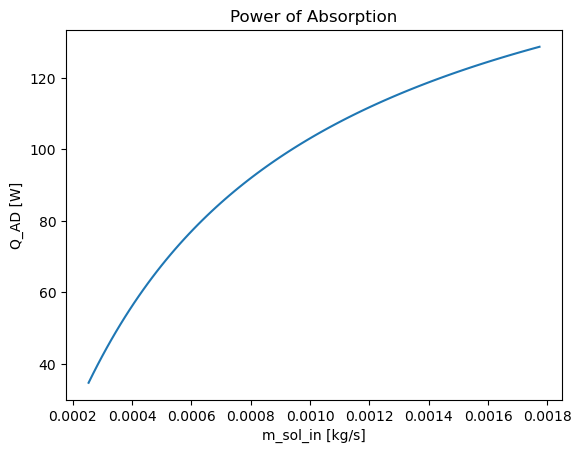

In [7]:
model = SorptionStorageSystem()
model.p_EC = 1800

# set up variable to vary
m_sol_in = np.linspace(10, 70, 100)

# transform from ml/min to kg/s
rho = 1.52 # kg/l
m_sol_in = m_sol_in / 1000 * rho / 60

# run model
res = model.single_parameter_variation("m_sol_in",  # --> parameter name in model (compare excel file)
                                       m_sol_in,    # --> array of parameter values (does not need to have same name)
                                       mode="absorption",
                                       plot_variable="Q_AD",
                                       editable_plot=True)
# edit plot (optional)
plt.title("Power of Absorption")
plt.ylabel("Q_AD [W]")
plt.xlabel("m_sol_in [kg/s]")
# show plot (only necessary if editable_plot==True)
plt.show()

# Perform variation of two parameters

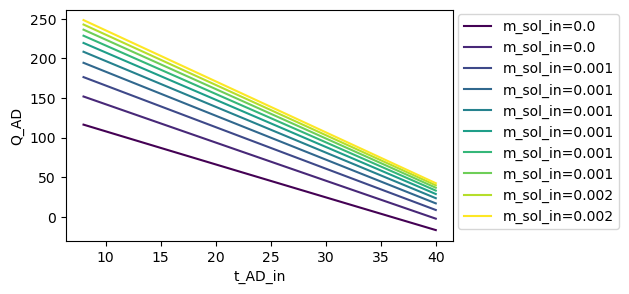

In [9]:
# initialize model
model = SorptionStorageSystem()

# set up variable to vary
m_sol_in = np.linspace(10, 70, 10)
t_AD_in  = np.linspace(8, 40, 10)

# transform from ml/min to kg/s
rho = 1.52 # kg/l
m_sol_in = m_sol_in / 1000 * rho / 60

# run model
res = model.two_parameters_variation("m_sol_in", m_sol_in,
                                    "t_AD_in", t_AD_in,
                                    mode="absorption",
                                    plot_variable="Q_AD",
                                    editable_plot=False)
plt.show()